In [22]:
import joblib as jl
import numpy as np

import matplotlib.pyplot as plt
# Load the "prune.pkl" file
with open("prune.pkl", "rb") as f:
    data = jl.load(f)
import pandas as pd
# Create a DataFrame from the data
df = pd.DataFrame(data)
# Transform the timestamp column to a datetime object
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H%M%S")
groups = df.groupby("dataset")

df.head()


,dataset_id,dataset,n-trees,timestamp,fidelity,greedy-fidelities
0,41703,mip-2016-classification,2,2024-05-01 20:49:05,0.795455,"[0.5227272727272727, 0.5, 0.6136363636363636, ..."
1,43672,heart-disease-dataset-(comprehensive),2,2024-05-01 20:49:04,0.957983,"[0.8487394957983193, 0.8445378151260504, 0.924..."
2,45058,credit-g,4,2024-05-01 20:49:05,0.920000,"[0.775, 0.605, 0.815, 0.76, 0.865, 0.83, 0.835..."
3,43098,students-scores,6,2024-05-01 20:49:04,0.820000,"[0.62, 0.66, 0.73, 0.74, 0.705, 0.735, 0.79, 0..."
4,44,spambase,6,2024-05-01 20:49:06,0.977199,"[0.8675352877307275, 0.8925081433224755, 0.905..."


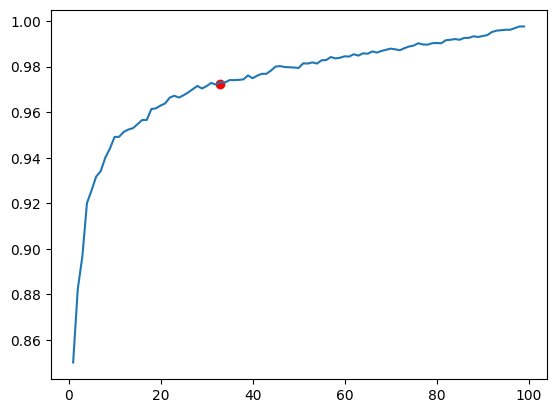

In [34]:
df2 = groups.agg({'timestamp': 'max'}).reset_index()

df3 = df.merge(df2, on=['dataset', 'timestamp'])
df3 = df3.sort_values(by=['timestamp', 'dataset'], ascending=[False, True])
df3 = df3.reset_index(drop=True)
df3

df3[df3['dataset'] == 45068]

y = df3['greedy-fidelities'][0]

x = np.arange(1, len(y)+1)
plt.plot(x, y)
xa = df3['n-trees'][0]
ya = df3['fidelity'][0]

plt.scatter(xa, ya, color='red')

plt.show()

In [38]:
import pandas as pd

df = pd.DataFrame([], columns=["dataset", "timestamp", "n-trees", "fidelity", "greedy-fidelities"])

print(len(df))

0
